### 1.4.10 Histograms in OpenCV ###

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
def plt_image(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [7]:
img = cv2.imread('dsu5.jpg', 0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

In [8]:
print(np.transpose(hist))

[[0.0000e+00 0.0000e+00 7.0000e+00 2.7000e+01 6.0000e+01 1.4900e+02
  2.2200e+02 3.5200e+02 5.0300e+02 7.5800e+02 1.2010e+03 1.5910e+03
  1.9880e+03 2.3500e+03 2.7890e+03 3.3540e+03 4.1160e+03 4.9830e+03
  5.4520e+03 5.8800e+03 5.9610e+03 6.1140e+03 6.2310e+03 6.3710e+03
  6.5960e+03 6.9510e+03 7.1480e+03 7.6360e+03 7.9290e+03 8.3450e+03
  8.8660e+03 9.6910e+03 9.7480e+03 9.9220e+03 9.5580e+03 9.0260e+03
  8.2720e+03 7.9730e+03 7.6830e+03 7.4520e+03 7.5540e+03 7.3440e+03
  7.2820e+03 7.0810e+03 6.9460e+03 7.0330e+03 7.0590e+03 7.2200e+03
  7.6000e+03 7.9630e+03 8.7690e+03 9.7780e+03 1.0668e+04 1.1426e+04
  1.1834e+04 1.1828e+04 1.1202e+04 1.0539e+04 9.5330e+03 8.5940e+03
  7.6320e+03 6.8960e+03 6.6820e+03 6.5470e+03 6.8660e+03 6.9840e+03
  7.2730e+03 7.6340e+03 8.0720e+03 8.1380e+03 8.3870e+03 8.3600e+03
  8.0840e+03 7.7120e+03 7.0160e+03 6.1780e+03 5.5680e+03 4.7040e+03
  4.1940e+03 3.8330e+03 3.2920e+03 3.0790e+03 2.8560e+03 2.5670e+03
  2.4950e+03 2.4670e+03 2.2620e+03 2.1860e+03 2.

In [9]:
hist = np.bincount(img.ravel(),minlength=256)

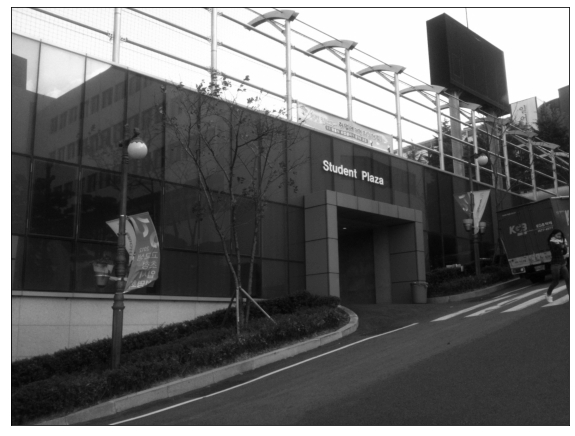

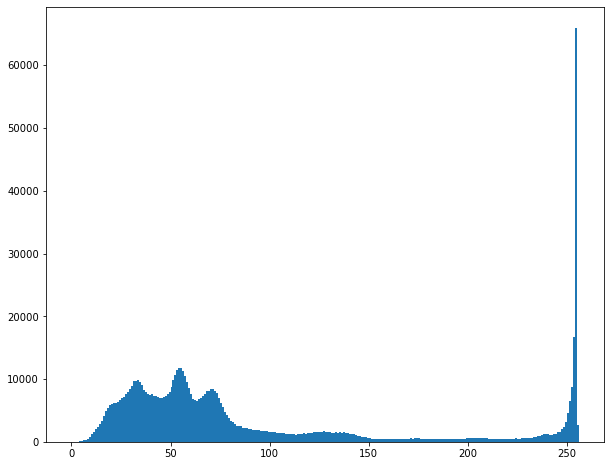

In [10]:
plt_image(img)

plt.hist(img.ravel(),256,[0,256]); 
plt.show()

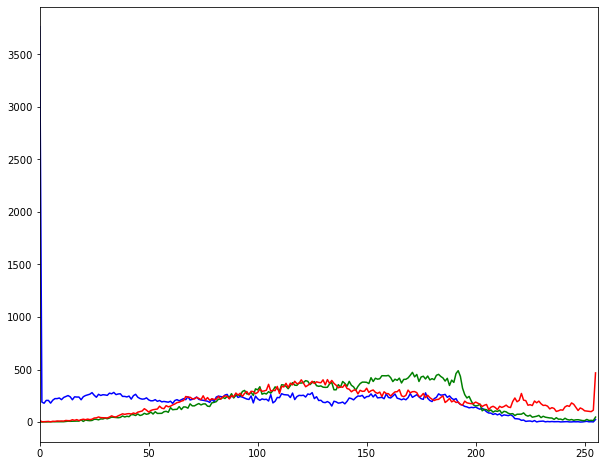

In [12]:
img = cv2.imread('wow.jpg')
color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

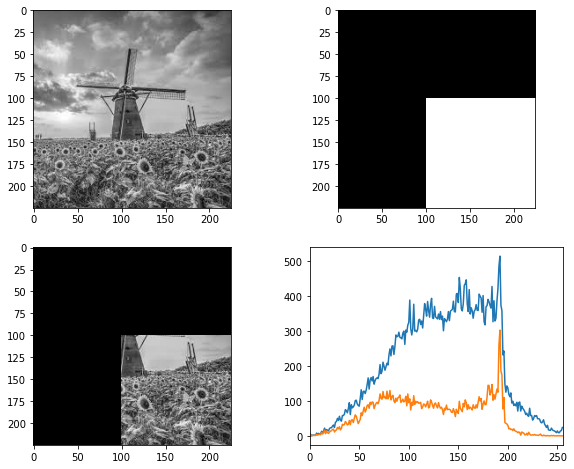

In [13]:
img = cv2.imread('wow.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

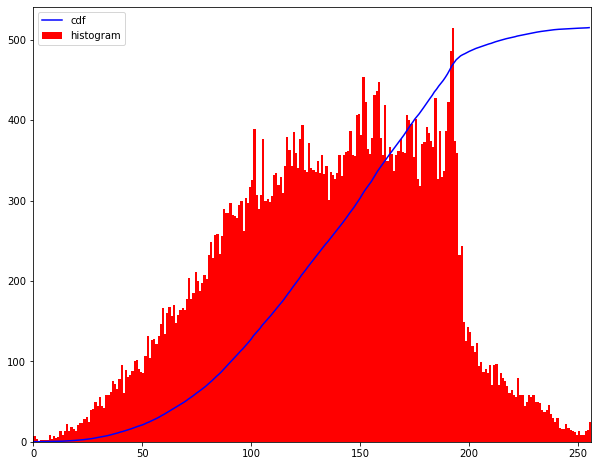

In [14]:
img = cv2.imread('wow.jpg',0)

hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

In [15]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]

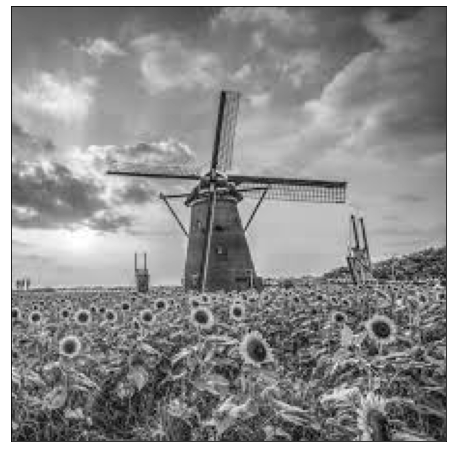

In [16]:
plt_image(img)

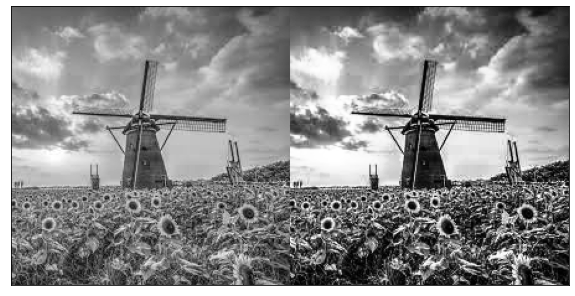

In [17]:
img = cv2.imread('wow.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ))

plt_image(res)